In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("blood_donor_dataset.csv")

In [12]:
df.shape

(10000, 12)

In [13]:
df.columns

Index(['donor_id', 'name', 'email', 'password', 'contact_number', 'city',
       'blood_group', 'availability', 'months_since_first_donation',
       'number_of_donation', 'pints_donated', 'created_at'],
      dtype='object')

In [14]:
df.describe

<bound method NDFrame.describe of         donor_id              name                          email    password  \
0     1b8b4c828a      Norma Fisher            ysullivan@yahoo.com  P5hX6Syg*A   
1     a6a3f7fe55     Eugene Bowman       hramos@brown-sellers.com  b6Wq6Cqz@5   
2     cee6478144  Sheri Bolton DDS          jasmine85@hotmail.com  $9RB51m#s7   
3     5986bc55f9        Kelly Boyd  pattylawrence@riley-hayes.com  @5Tdg(4kCm   
4     93246afe6c     Taylor Guzman       martinezjacob@wilson.com  x!)9Ag@J*7   
...          ...               ...                            ...         ...   
9995  700aeefbf1      Bradley Pham           jessica49@turner.com  ^@d9SMqSa1   
9996  487b342992    Richard Harris              megan51@gmail.com  D1OAZg5i)g   
9997  ddf4485d67        Autumn Kim       curtisdonald@wilson.info  3wU2fua(#7   
9998  4256813ba5     Janice Murphy   jenningscristian@hotmail.com  &8zDeXl)b(   
9999  5452d8afd3     Edward Graham               oyates@yahoo.com  ud(J5UjH

In [15]:
df = df.drop(columns=['donor_id', 'name', 'email', 'password', 'contact_number', 'city', 'created_at'])


In [16]:
df.isnull().sum()

blood_group                    0
availability                   0
months_since_first_donation    0
number_of_donation             0
pints_donated                  0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
le=LabelEncoder()
df['blood_group'] = le.fit_transform(df['blood_group'])

In [21]:
X = df.drop(columns=['availability'])
y = df['availability']

In [22]:
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
print("Shape of training Set:", X_train.shape)
print("Shape of testing Set:", X_test.shape)

Shape of training Set: (8000, 4)
Shape of testing Set: (2000, 4)


### Clustering

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [27]:
kmeans=KMeans(n_clusters=2, random_state=42)
clusters=kmeans.fit_predict(X_scaled)

In [28]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.2878570558939193


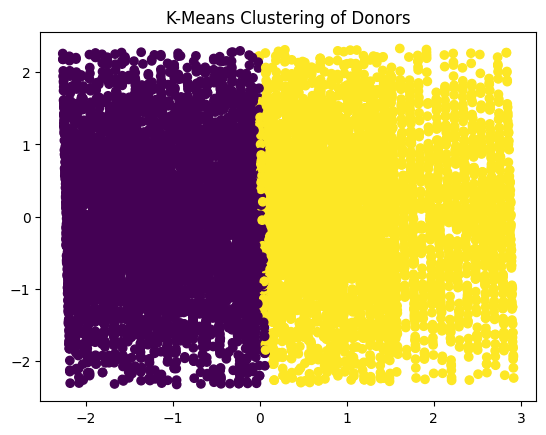

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering of Donors")
plt.show()
